In [ ]:
In questa esercitazione, simuleremo il ground state di una particella soggetta a un potenziale V(x) = x^4 -5/2*x^2 (1D).
Dapprima, implementeremo un algoritmo di Metropolis per campionare il modulo quadro della funzione d'onda della particella, utilizzando una probabilità di transizione uniforme. 
Usando il data blocking calcoleremo poi il valore di aspettazione dell'hamiltoniana. 
In secondo luogo, ci occuperemo di trovare i parametri mu e sigma che minimizzano il valor medio dell'Hamiltoniana, performando l'algoritmo del Simulated Annealing, partendo da
una temperatura iniziale di To=2 (tutte le grandezze sono in unità naturali) ed evolvendo la temperatura secondo la legge T=To*co^t, dove co=0.9 e t è lo step. E' stata
scelta questa legge e questi parametri in modo tale che la temperatura potesse variare lentamente.
Nei grafici sotto riportati è possibile vedere per 3 delle temperature l'energia in funzione degli step, che si abbassa man mano che la temperatura decresce. E' inoltre presente il 
grafico dell'energia finale calcolata con i parametri mu e sigma che sono stati ricavati dal simulated annealing, e come ultimo è presente l'istogramma del campionameto 
della funzione d'onda paragonato con la curva analitica.
I parametri mu e sigma trovati sono: mu = -0.780447, sigma = 0.627525

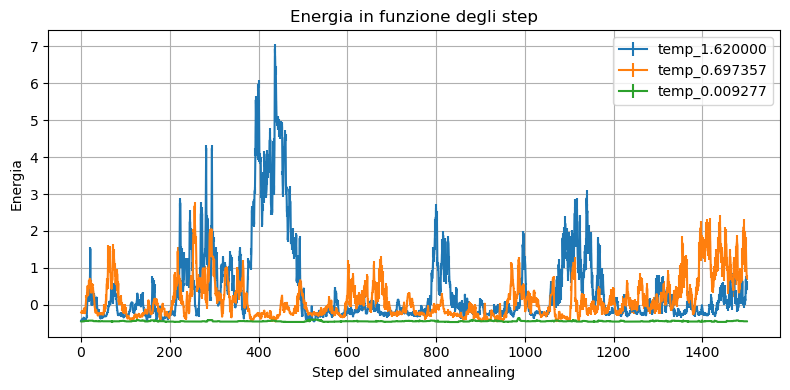

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Lista dei nomi dei file
filenames = ['temp_1.620000.dat', 'temp_0.697357.dat', 'temp_0.009277.dat']

# Inizializzazione delle liste per i dati
x_data = []
mu_data = []
sigma_data = []
energy_data = []
error_data = []

# Lettura dei dati dai file
for filename in filenames:
    x = []
    mu = []
    sigma = []
    energy = []
    error = []
    with open(filename, 'r') as file:
        num_data = 0  # Contatore dei dati nel file
        for line in file:
            if not line.startswith('#'):  # Salta le righe che iniziano con #
                num_data += 1  # Incrementa il contatore dei dati
                data = line.strip().split()
                mu.append(float(data[0]))
                sigma.append(float(data[1]))
                energy.append(float(data[2]))  
                error.append(float(data[3]))  
        x = np.arange(1, num_data + 1)  # Numeri di dati nel file
    x_data.append(x)
    mu_data.append(mu)
    sigma_data.append(sigma)
    energy_data.append(energy)
    error_data.append(error)

# Creazione del grafico
plt.figure(figsize=(8, 4))

# Plot dei dati
for i in range(len(filenames)):
    label = os.path.splitext(filenames[i])[0]
    plt.errorbar(x_data[i], energy_data[i], yerr=error_data[i], label=label)

# Personalizzazione del grafico
plt.xlabel('Step del simulated annealing')
plt.ylabel('Energia')
plt.title('Energia in funzione degli step')
plt.legend()  # Mostra la leggenda con i titoli dei file

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()

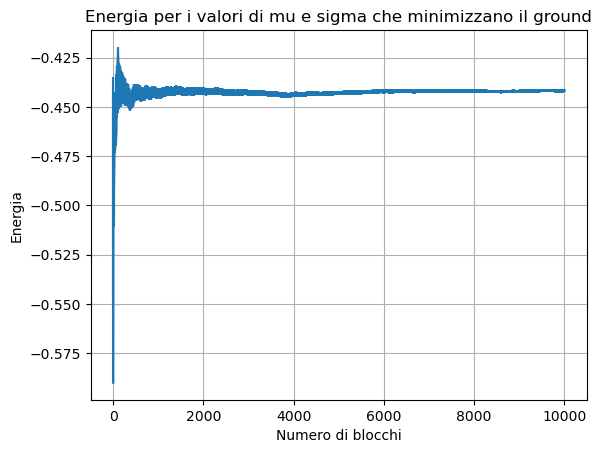

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(filename):
    # Inizializza due liste vuote per memorizzare i dati
    energia = []
    errore = []

    # Apre il file e legge i dati riga per riga
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        for line in file:
            # Salta le righe che iniziano con #
            if line.strip().startswith('#'):
                continue
            # Divide ogni riga in due numeri e li aggiunge alle rispettive liste
            values = line.split()
            energia.append(float(values[0]))
            errore.append(float(values[1]))
    
    # Genera la lista n come indice per le righe lette
    n = list(range(1, len(energia) + 1))
            
    return n, energia, errore

# Chiamata alla funzione per leggere i dati dal file
n, energia, errore = read_data_from_file("optimized_energy.dat")
plt.errorbar(n, np.array(energia), yerr=np.array(errore))
plt.title('Energia per i valori di mu e sigma che minimizzano il ground')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia')
plt.grid(True)
plt.show()

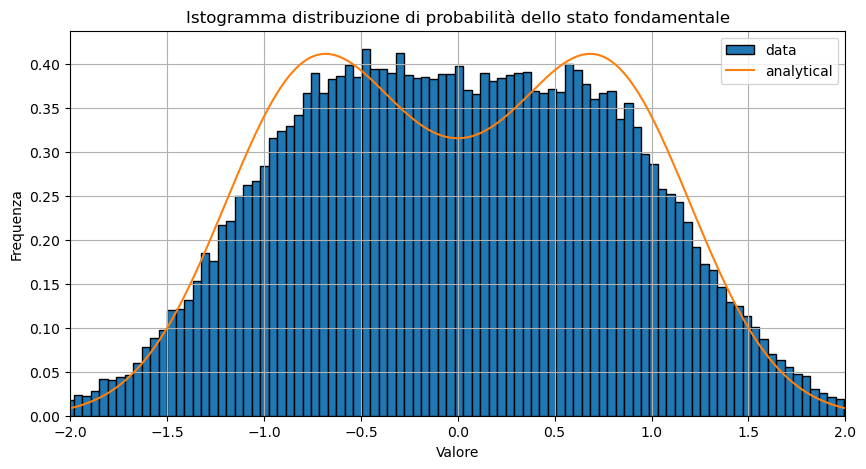

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Carica solo la seconda colonna dei dati
data = np.loadtxt('psi_squared.dat', usecols=0)

# Definizione delle funzioni wave, norm e wave2
def wave(x):
    return (np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-(x+mu)**2)/(2*sigma**2)))

def norm(mu, sigma):
    return 2 * (1 + np.exp(-mu**2/sigma**2)) * np.sqrt(np.pi) * abs(sigma)

def wave2(x, mu, sigma):
    return wave(x)**2 / norm(mu, sigma)

# Parametri mu e sigma
mu = -0.780447
sigma = 0.627525

# Range di x per il plot
x = np.linspace(-5, 5, 1000)

# Creazione del plot
plt.figure(figsize=(10, 5))
plt.hist(data, bins=200, edgecolor='black', density=True, label='data')  # Plot dell'istogramma con i dati della seconda colonna
plt.plot(x, wave2(x, mu, sigma), label='analytical')  # Plot della curva analitica
plt.xlim(-2, 2)
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.title('Istogramma distribuzione di probabilità dello stato fondamentale')
plt.legend()
plt.grid(True)
plt.show()